In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv('/content/drive/My Drive/US_Accidents_Dec19.csv')

In [3]:
data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
data.shape

(2974335, 49)

In [0]:
data = data.fillna(0)

In [0]:
data.isnull().sum()

ID                       0
Source                   0
TMC                      0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Number                   0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
N

In [0]:
data['accident_probability'] = data['Severity']

In [0]:
data['Severity']

0          3
1          2
2          2
3          3
4          2
          ..
2974330    2
2974331    2
2974332    2
2974333    2
2974334    2
Name: Severity, Length: 2974335, dtype: int64

In [0]:
data['accident_probability']

0          3
1          2
2          2
3          3
4          2
          ..
2974330    2
2974331    2
2974332    2
2974333    2
2974334    2
Name: accident_probability, Length: 2974335, dtype: int64

In [0]:
data.loc[(data.accident_probability == 1),'accident_probability']= 0
data.loc[(data.accident_probability == 2),'accident_probability']= 1
data.loc[(data.accident_probability == 3),'accident_probability']= 1
data.loc[(data.accident_probability == 4),'accident_probability']= 1

In [0]:
data['accident_probability']

0          1
1          1
2          1
3          1
4          1
          ..
2974330    1
2974331    1
2974332    1
2974333    1
2974334    1
Name: accident_probability, Length: 2974335, dtype: int64

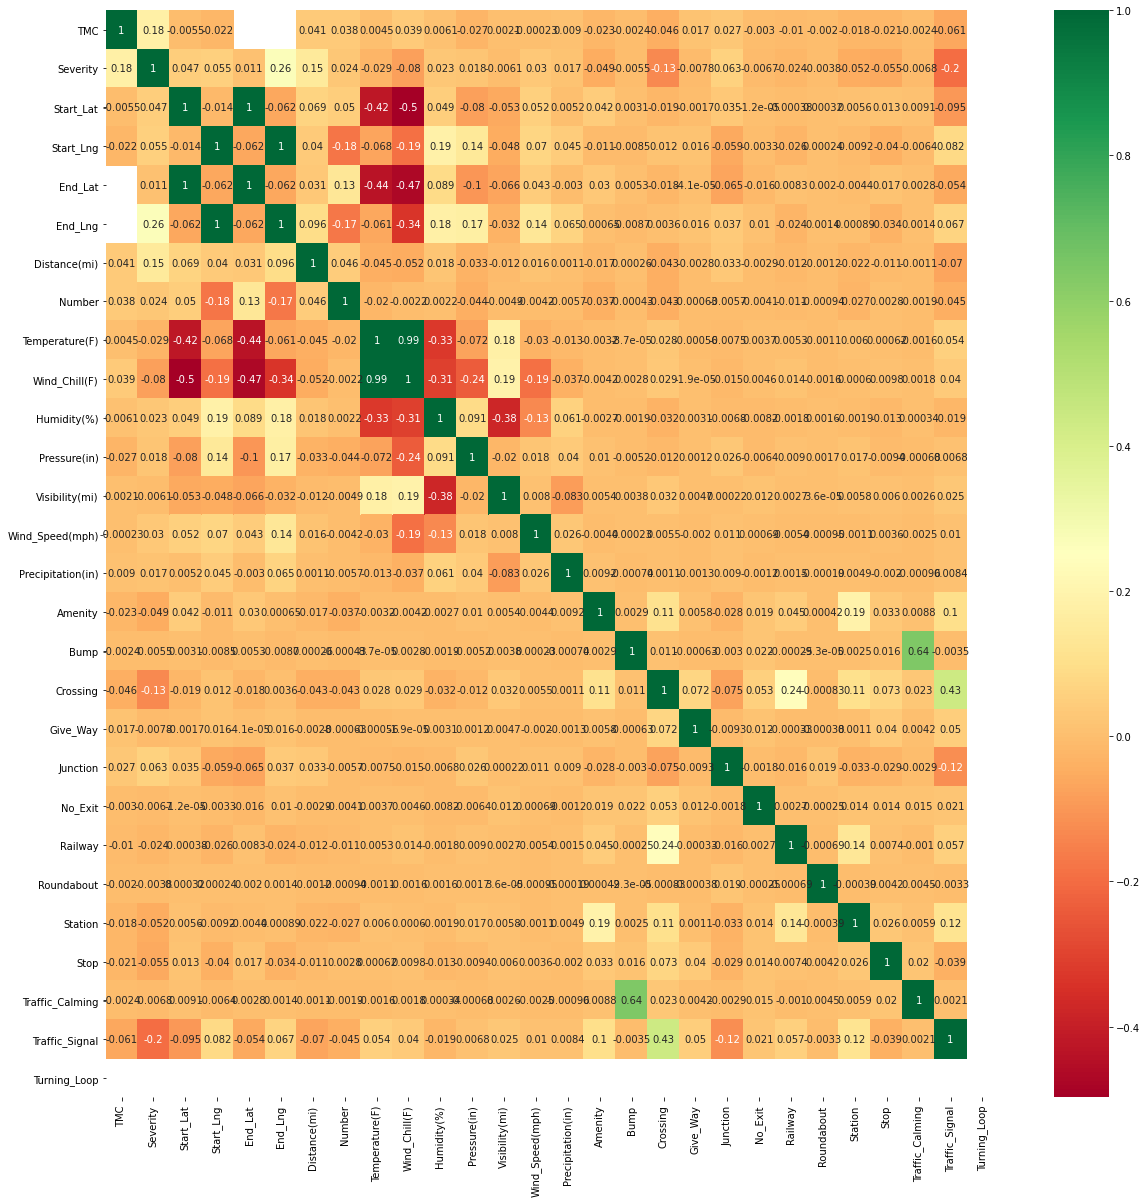

In [55]:
import seaborn as sns
c = data.corr()
top_corr_features = c.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [0]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [8]:
 data.isnull().sum()

ID                       0
Source                   0
TMC                      0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Number                   0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
N

In [0]:
df_state=data.groupby(['State'], as_index=False).count().iloc[:,:2]
df_state=df_state.rename(columns={"ID":"Accidents"})
df_state.sort_values(by=['Accidents'], ascending=False, inplace=True)
df_state.head()

,State,Accidents
3,CA,663204
41,TX,298062
8,FL,223746
38,SC,146689
25,NC,142460


In [0]:
data.head()

In [0]:
data1 = data.drop(['ID','Source','Description','Start_Time','End_Time','Weather_Timestamp','Side','Zipcode','City','Street','Country','County','State','Timezone','Airport_Code','Wind_Direction','Weather_Condition'], axis=1)

In [42]:
data1.head()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Zipcode,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,accident_probability
0,201.0,3,39.865147,-84.058723,0.0,0.0,0.01,0.0,45424,36.9,0.0,91.0,29.68,10.0,0.0,0.02,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,1
1,201.0,2,39.928059,-82.831184,0.0,0.0,0.01,2584.0,43068-3402,37.9,0.0,100.0,29.65,10.0,0.0,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,1
2,201.0,2,39.063148,-84.032608,0.0,0.0,0.01,0.0,45176,36.0,33.3,100.0,29.67,10.0,3.5,0.00,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,1
3,201.0,3,39.747753,-84.205582,0.0,0.0,0.01,0.0,45417,35.1,31.0,96.0,29.64,9.0,4.6,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,1
4,201.0,2,39.627781,-84.188354,0.0,0.0,0.01,0.0,45459,36.0,33.3,89.0,29.65,6.0,3.5,0.00,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,1


In [0]:
data1.isnull().sum()
data1= data1.fillna(0)

In [0]:
data1.Amenity = data1.Amenity.replace({True: 1, False: 0})
data1.Bump = data1.Bump.replace({True: 1, False: 0})
data1.Crossing = data1.Give_Way.replace({True: 1, False: 0})
data1.Junction = data1.Junction.replace({True: 1, False: 0})
data1.No_Exit = data1.No_Exit.replace({True: 1, False: 0})
data1.Railway = data1.Railway.replace({True: 1, False: 0})
data1.Give_Way = data1.Give_Way.replace({True: 1, False: 0})
data1.Roundabout = data1.Roundabout.replace({True: 1, False: 0})

In [0]:
data1.Station = data1.Station.replace({True: 1, False: 0})
data1.Stop = data1.Stop.replace({True: 1, False: 0})
data1.Traffic_Calming = data1.Traffic_Calming.replace({True: 1, False: 0})
data1.Traffic_Signal = data1.Traffic_Signal.replace({True: 1, False: 0})
data1.Turning_Loop = data1.Turning_Loop.replace({True: 1, False: 0})

In [0]:
data1.Sunrise_Sunset = data1.Sunrise_Sunset.replace({'Day': 0, 'Night': 1})
data1.Civil_Twilight = data1.Civil_Twilight.replace({'Day': 0, 'Night': 1})
data1.Nautical_Twilight = data1.Nautical_Twilight.replace({'Day': 0, 'Night': 1})
data1.Astronomical_Twilight = data1.Astronomical_Twilight.replace({'Day': 0, 'Night': 1})

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from numpy import *

X_train = data1.drop("accident_probability",axis=1)
Y_train = data1["accident_probability"]


X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)


X_test.fillna(X_test.mean())

nav = GaussianNB()
y_pred = nav.fit(X_train, Y_train).predict(X_test)
acc_knn = round(nav.score(X_train, Y_train) * 100, 2)
print("NAV accuracy is:",acc_knn)

NAV accuracy is: 60.72


In [57]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

print('The total null values in the dataset are ',data1.isnull().sum().sum())

X=data1.drop(['accident_probability'],axis=1)
Y=data1[['accident_probability']]

regr = linear_model.LinearRegression()
regr.fit(X, Y)

y_pred = regr.predict(X)

numeric_features = data1.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print('Top 5 correlated variables to the target variable quality is: ')
print(corr['accident_probability'].sort_values(ascending=False)[:7],'\n')

The total null values in the dataset are  0
Top 5 correlated variables to the target variable quality is: 
accident_probability    1.000000
Severity                0.045325
End_Lat                 0.010154
Junction                0.004434
Wind_Chill(F)           0.003770
Distance(mi)            0.003118
Start_Lat               0.001158
Name: accident_probability, dtype: float64 



In [58]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [59]:
print(model.feature_importances_)

[1.61527515e-05 9.99956052e-01 7.66286089e-08 1.89915665e-07
 1.48420398e-05 9.90282224e-06 1.25768110e-07 2.70188510e-08
 1.90263164e-07 2.70143975e-07 7.21800579e-09 0.00000000e+00
 1.77929984e-08 3.10514965e-07 2.84719050e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 9.85463981e-07
 0.00000000e+00 1.67152679e-07 0.00000000e+00 0.00000000e+00
 4.93467169e-08 0.00000000e+00 2.73058748e-07 0.00000000e+00
 4.92099251e-09 7.00224021e-08 0.00000000e+00 0.00000000e+00]


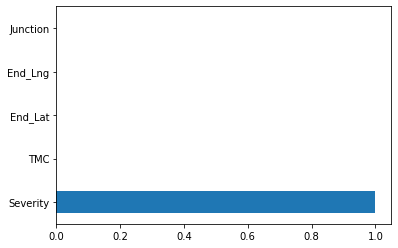

In [60]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

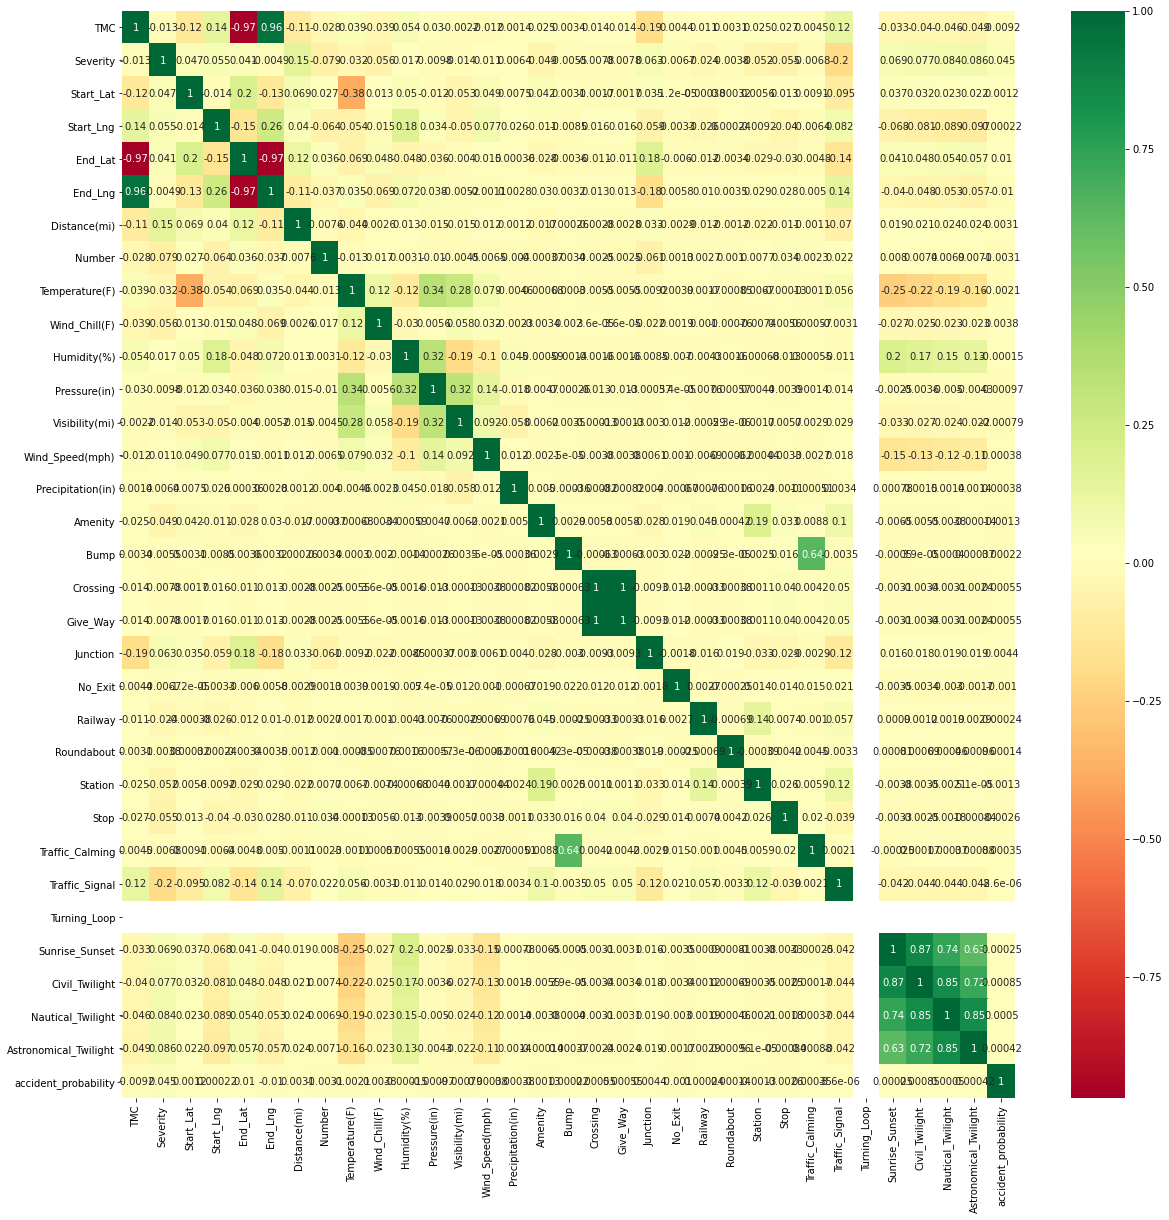

In [52]:
import seaborn as sns
c = data1.corr()
top_corr_features = c.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [0]:
print(y_pred[:10])

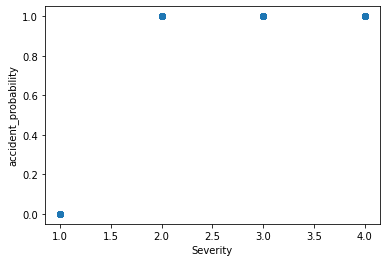

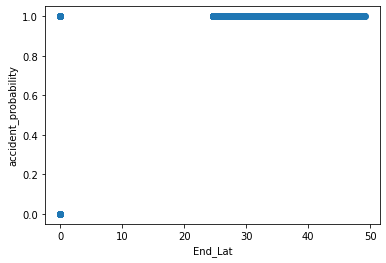

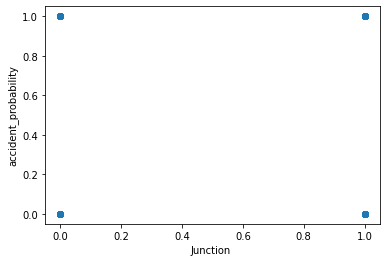

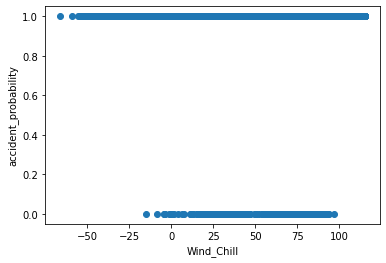

In [17]:
import matplotlib.pyplot as plt

plt.scatter(x=data1['Severity'], y=data1['accident_probability'])
plt.ylabel('accident_probability')
plt.xlabel('Severity')
plt.show()

plt.scatter(x=data1['End_Lat'], y=data1['accident_probability'])
plt.ylabel('accident_probability')
plt.xlabel('End_Lat')
plt.show()

plt.scatter(x=data1['Junction'], y=data1['accident_probability'])
plt.ylabel('accident_probability')
plt.xlabel('Junction ')
plt.show()

plt.scatter(x=data1['Wind_Chill(F)'], y=data1['accident_probability'])
plt.ylabel('accident_probability')
plt.xlabel('Wind_Chill')
plt.show()

In [18]:
X_train.shape

(2379468, 32)

In [16]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
my_model = Sequential() # create model
my_model.add(Dense(64, input_dim=32, activation='relu')) # hidden layer
my_model.add(Dense(32, activation='relu'))
my_model.add(Dense(1, activation='sigmoid')) # output layer
my_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_model_fit = my_model.fit(X_train, Y_train, epochs=1, initial_epoch=0)
print(my_model.summary())
print(my_model.evaluate(X_test, Y_test))

Using TensorFlow backend.


Epoch 1/1
2379468/2379468 [==============================] - 202s 85us/step - loss: 0.0480 - acc: 0.9995
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 4,225
Trainable params: 4,225
Non-trainable params: 0
_________________________________________________________________
None
594867/594867 [==============================] - 21s 36us/step
[0.0033275752718949364, 0.9996251463890076]


In [0]:
import pandas as pd

In [0]:
! pip install pycaret

In [0]:
data = data.fillna(0)

In [0]:
from pycaret.classification import *
clf1 = setup(data = data1, target = 'Severity')
# creating a model
xgboost = create_model('xgboost')
# interpreting model
interpret_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9814,0.0,0.6424,0.9797,0.9802,0.9595
1,0.9815,0.0,0.6420,0.9798,0.9802,0.9597
2,0.9815,0.0,0.6423,0.9798,0.9802,0.9597
3,0.9810,0.0,0.6408,0.9793,0.9797,0.9586
4,0.9817,0.0,0.6434,0.9800,0.9804,0.9600
5,0.9815,0.0,0.6432,0.9798,0.9802,0.9596
6,0.9813,0.0,0.6445,0.9796,0.9801,0.9592
7,0.9810,0.0,0.6429,0.9794,0.9799,0.9587
8,0.9814,0.0,0.6443,0.9797,0.9802,0.9594
9,0.9814,0.0,0.6424,0.9797,0.9801,0.9595


SystemExit: ignored

In [22]:
from pycaret.regression import *
reg1 = setup(data = data1, target = 'accident_probability')
# creating decision tree model
dt = create_model('dt')
# ensembling decision tree model (boosting)
dt_boosted = ensemble_model(dt, method = 'Boosting')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0


In [0]:
from keras.engine.saving import load_model
my_model.save('my_model.h5')
my_model = load_model('my_model.h5')

In [19]:
my_model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(my_model.predict(X_test))

[[0.99981815]
 [0.99943846]
 [0.99975675]
 ...
 [1.        ]
 [0.99998343]
 [0.9996499 ]]


In [0]:
import pickle
with open("/content/drive/My Drive/Colab Notebooks/Chaitanya_project.pk2",'wb') as file:
      pickle.dump(my_model,file)

In [27]:
pip install flask


In [26]:
model = load_model('my_model.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 4,225
Trainable params: 4,225
Non-trainable params: 0
_________________________________________________________________


In [28]:
X=data1.drop(['accident_probability'],axis=1)
Y=data1[['accident_probability']]
score = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

acc: 99.97%


In [0]:
import h5py

In [0]:
f = h5py.File('my_model.h5','a')


In [40]:
import numpy as np 
from keras.models import load_model
my_model = load_model('my_model.h5')

predictions = my_model.predict(np.loadtxt("test.csv", delimiter=";"))

print(predictions.shape)

my_predictions=my_model.predict(predictions)

print(my_predictions)

(594867, 32)

In [0]:
score = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))